In [74]:
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
 
bureaudata = pd.read_csv("C:\\Users\\khann\\Desktop\\Python Assignments\\home-credit-default-risk\\bureau.csv")
applicationdata = pd.read_csv("C:\\Users\\khann\\Desktop\\Python Assignments\\home-credit-default-risk\\application_train.csv")
creditcardbalance = pd.read_csv("C:\\Users\\khann\\Desktop\\Python Assignments\\home-credit-default-risk\\credit_card_balance.csv")
bureaucreditdata = bureaudata.groupby(['SK_ID_CURR'], as_index=False)['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_OVERDUE','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_LIMIT','AMT_ANNUITY'].sum()
app_bureau_data=pd.merge(applicationdata,bureaucreditdata,on='SK_ID_CURR',how='left')
creditcarddata = creditcardbalance.groupby(['SK_ID_CURR'], as_index=False)['AMT_BALANCE','AMT_INST_MIN_REGULARITY'].sum()
app_bureau_credit_data = pd.merge(app_bureau_data,creditcarddata,on='SK_ID_CURR',how='left')
app_bureau_credit_data=app_bureau_credit_data.fillna(0)
app_bureau_credit_data.head(2)


<ipython-input-74-7efeba0de810>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bureaucreditdata = bureaudata.groupby(['SK_ID_CURR'], as_index=False)['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_OVERDUE','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_LIMIT','AMT_ANNUITY'].sum()
<ipython-input-74-7efeba0de810>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  creditcarddata = creditcardbalance.groupby(['SK_ID_CURR'], as_index=False)['AMT_BALANCE','AMT_INST_MIN_REGULARITY'].sum()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_LIMIT,AMT_ANNUITY_y,AMT_BALANCE,AMT_INST_MIN_REGULARITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,1.0,865055.565,245781.0,0.0,0.0,31988.565,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,1017400.500,0.0,0.0,0.0,810000.000,0.0,0.0,0.0


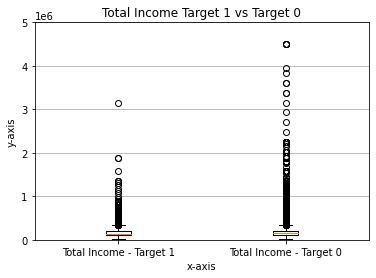

In [75]:
%matplotlib inline
DataTarget1=app_bureau_credit_data[app_bureau_credit_data['TARGET']>0]
DataTarget0=app_bureau_credit_data[app_bureau_credit_data['TARGET']==0]
TotalIncomeTarget1=DataTarget1['AMT_INCOME_TOTAL']
TotalIncomeTarget0=DataTarget0['AMT_INCOME_TOTAL']
data = list([TotalIncomeTarget1, TotalIncomeTarget0])
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Total Income Target 1 vs Target 0')
plt.ylim(0,5000000);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Total Income - Target 1', 'Total Income - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

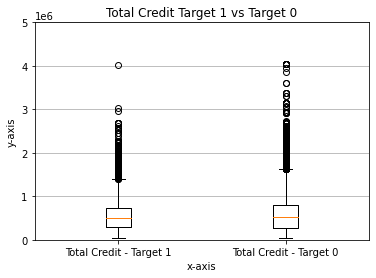

In [76]:
Credit1=DataTarget1['AMT_CREDIT']
Credit0=DataTarget0['AMT_CREDIT']
data = list([Credit1, Credit0])
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Total Credit Target 1 vs Target 0')
plt.ylim(0,5000000);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Total Credit - Target 1', 'Total Credit - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

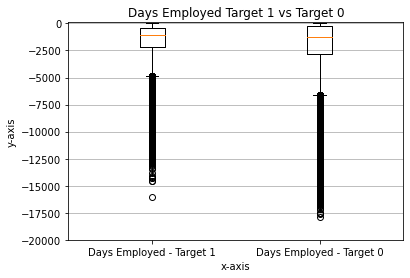

In [77]:
DaysEmployed1=DataTarget1['DAYS_EMPLOYED']
DaysEmployed0=DataTarget0['DAYS_EMPLOYED']
data = list([DaysEmployed1, DaysEmployed0])
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Days Employed Target 1 vs Target 0')
plt.ylim(-20000, 100);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Days Employed - Target 1', 'Days Employed - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

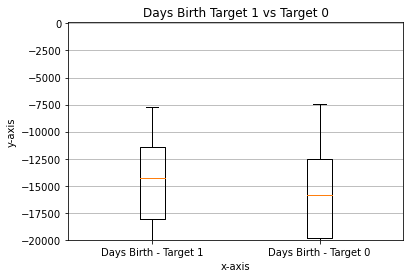

In [78]:
DaysBirth1=DataTarget1['DAYS_BIRTH']
DaysBirth0=DataTarget0['DAYS_BIRTH']
data = list([DaysBirth1, DaysBirth0])
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Days Birth Target 1 vs Target 0')
plt.ylim(-20000, 100);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Days Birth - Target 1', 'Days Birth - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

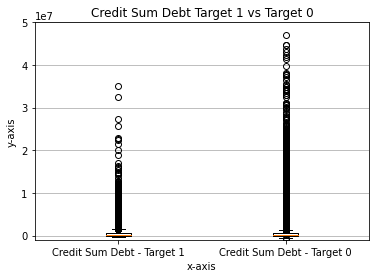

In [99]:
CreditSumDebt1=DataTarget1['AMT_CREDIT_SUM_DEBT']
CreditSumDebt0=DataTarget0['AMT_CREDIT_SUM_DEBT']
data = list([CreditSumDebt1, CreditSumDebt0])
#print(data)
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Credit Sum Debt Target 1 vs Target 0')
plt.ylim(-1000000, 50000000);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Credit Sum Debt - Target 1', 'Credit Sum Debt - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

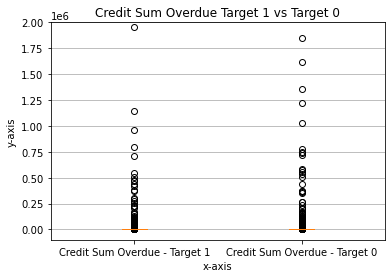

In [92]:
CreditSumOverdue1=DataTarget1['AMT_CREDIT_SUM_OVERDUE']
CreditSumOverdue0=DataTarget0['AMT_CREDIT_SUM_OVERDUE']
data = list([CreditSumOverdue1, CreditSumOverdue0])
#print(data)
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Credit Sum Overdue Target 1 vs Target 0')
plt.ylim(-100000, 2000000);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Credit Sum Overdue - Target 1', 'Credit Sum Overdue - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

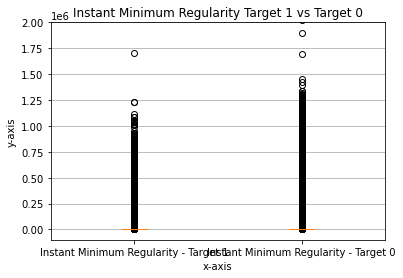

In [94]:
InstMinReg1=DataTarget1['AMT_INST_MIN_REGULARITY']
InstMinReg0=DataTarget0['AMT_INST_MIN_REGULARITY']
data = list([InstMinReg1, InstMinReg0])
#print(data)
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Instant Minimum Regularity Target 1 vs Target 0')
plt.ylim(-100000, 2000000);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Instant Minimum Regularity - Target 1', 'Instant Minimum Regularity - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

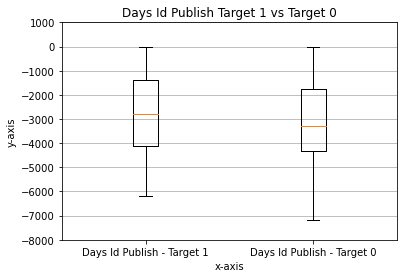

In [95]:
DaysIdPublish1=DataTarget1['DAYS_ID_PUBLISH']
DaysIdPublish0=DataTarget0['DAYS_ID_PUBLISH']
data = list([DaysIdPublish1, DaysIdPublish0])
#print(data)
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Days Id Publish Target 1 vs Target 0')
plt.ylim(-8000, 1000);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Days Id Publish - Target 1', 'Days Id Publish - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

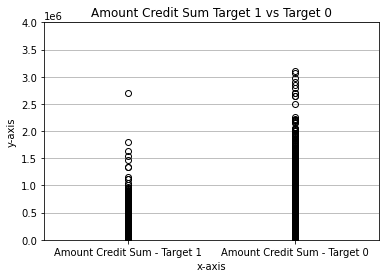

In [97]:
AmountCreditSum1=DataTarget1['AMT_CREDIT_SUM_LIMIT']
AmountCreditSum0=DataTarget0['AMT_CREDIT_SUM_LIMIT']
data = list([AmountCreditSum1, AmountCreditSum0])
#print(data)
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Amount Credit Sum Target 1 vs Target 0')
plt.ylim(0, 4000000);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Amount Credit Sum - Target 1', 'Amount Credit Sum - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

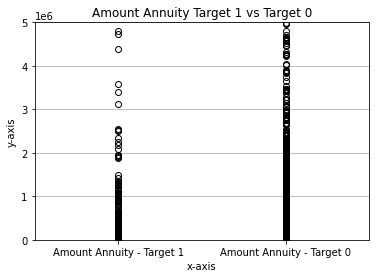

In [98]:
AmountAnnuty1=DataTarget1['AMT_ANNUITY_y']
AmountAnnuty0=DataTarget0['AMT_ANNUITY_y']
data = list([AmountAnnuty1, AmountAnnuty0])
#print(data)
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Amount Annuity Target 1 vs Target 0')
plt.ylim(0, 5000000);
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['Amount Annuity - Target 1', 'Amount Annuity - Target 0']
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()